# Restaurant's Location in Medellin, Antioquia, Colombia

Medellín is divided in zones called "Comunas", each one has several neighborhoods associated with it. The neighborhoods that belong to the same comuna share some socioeconomic profiles related to people's purchasing power, education, mean of trasportation, etc.

When trying to find a location for a restaurant it is important to take into account people's ability to buy from the restaurant and the density of restaurants that the location has, because generally the more restaurants a zone has, the more people will recognize that specific location as a place to eat.

The goal of this project is to determine a great location for a restaurant in Medellín based in the current density of restaurants in certain zones of the city and a socioeconomic indicator of each zone.

Install the googlemaps package to get the coordinates of each one of Medellin's neighborhoods

In [27]:
pip install -U googlemaps

  Stored in directory: C:\Users\hamar\AppData\Local\pip\Cache\wheels\3c\3f\25\ce6d7722dba07e5d4a12d27ab38f3d7add65ef43171b02c819
Successfully built googlemaps
Note: you may need to restart the kernel to use updated packages.


Import the packages needed and the first file with relevant data for the project.

The CSV imported here contains information about the Neighborhood name and a corresponding socioeconomic. In colombia there is a socioeconomic indicator called "Estrato" (Stratum) which is associated with people's wealth. This indicator goes from 1 to 6, 1 meaning poverty (Low) and 6 meaning wealth (High).

The table imported has the name of each neighborhood, the number of homes in that neighborhoods associated with each one of the "Estratos" and the total of homes. The neighborhood id, which is used as index in this case contains first the number of the comuna to which the neighborhoods belongs followed by a consecutive id for each of the neighborhoods in the comuna.

The data in this table was available in the url: https://www.medellin.gov.co/irj/go/km/docs/pccdesign/SubportaldelCiudadano_2/PlandeDesarrollo_0_17/Publicaciones/Shared%20Content/sisben/03_ViviendasComunaBarrioVeredaEstrato_Certificada_17122015.pdf. That is the webpage of Medellin's government.

The data is available in a pdf file. An online tool was used to convert the file to excel and then manually clean it and save it in CSV format in order to import it to the notebook.

In [2]:
import googlemaps
import pandas as pd

df = pd.read_csv('Data/neighborhoods_stratification.csv', encoding='Latin-1', sep=';', header=0, index_col=0)
neigh = df.neighborhood_name
stratification = df
stratification.head()

,neighborhood_name,se_1,se_2,se_3,se_4,se_5,se_6,Total
neighborhood_id,,,,,,,,
101,Santo Domingo Savio 1,1763,4667,4,0,0,0,6434
102,Santo Domingo Savio 2,1905,389,1,1,0,0,2296
103,Popular,1183,5427,6,0,0,0,6616
104,Granizal,421,2721,4,0,0,0,3146
105,Moscu 2,618,3318,3,1,0,0,3940


Specify googlemaps API KEY and some adiiontal dataframe columns and lists needed to get neighborhoods coordinates.

In [3]:
gmaps_key = googlemaps.Client(key = 'KEY')
df['lat'] = None
df['lng'] = None
neigh_list = []
lat_list = []
lng_list = []

Using the name of each neighborhood concatenated with the name of the city, department, and country get the latitude and longitude of each neighborhood and create a new DataFrame with neighborhood's name, latitude and longitude.

In [4]:
for neighborhood in neigh:
    location = neighborhood + ', Medellin, Antioquia, Colombia'
    geocode_result = gmaps_key.geocode(location)
    try:
        lat = geocode_result[0]['geometry']['location']['lat']
        lng = geocode_result[0]['geometry']['location']['lng']
    except:
        lat = 'NaN'
        lng = 'NaN'   
    
    neigh_list.append(neighborhood)
    lat_list.append(lat)
    lng_list.append(lng)

In [5]:
coordinates = pd.DataFrame(
    {'neighborhood': neigh_list,
     'latitude': lat_list,
     'longitude': lng_list
    })

coordinates


,neighborhood,latitude,longitude
0,Santo Domingo Savio 1,6.293187,-75.541724
1,Santo Domingo Savio 2,6.299993,-75.541499
2,Popular,6.303366,-75.546594
3,Granizal,6.292365,-75.545866
4,Moscu 2,6.288531,-75.547321
5,Villa Guadalupe,6.284778,-75.551688
6,San Pablo,6.284615,-75.545866
7,El Compromiso,6.284574,-75.544410
8,Aldea Pablo VI,6.287409,-75.541863
9,La Esperanza 2,6.291263,-75.541238


When the map was created I noticed the coordinates for Villa Hermosa were not right so I corrected them manually.

In [6]:
coordinates.loc[coordinates['neighborhood'] == ' Villa Hermosa', 'latitude'] = 6.255480
coordinates.loc[coordinates['neighborhood'] == ' Villa Hermosa', 'longitude'] = -75.552885
coordinates.loc[coordinates['neighborhood'] == ' Villa Hermosa']

,neighborhood,latitude,longitude
98,Villa Hermosa,6.25548,-75.552885


Coordinates DataFrame is exported to a csv file in order to avoid calling google's api each time I start working on the project again after closing the notebook.

In [7]:
coordinates.to_csv('Data/neighborhoods_coordinates.csv', sep=';')

In [8]:
coordinates = pd.read_csv('Data/neighborhoods_coordinates.csv', sep=';', index_col=0)

Install folium and create a map of Medellin to locate neighborhoods and comunas.

In [ ]:
conda install -c conda-forge folium

In [9]:
import folium

mde_coordinates = [6.2518400, -75.5635900]
mde_map = folium.Map(location=mde_coordinates, zoom_start = 12)

mde_map

<img src="map1.png" />

In the following map each blue circle represents a neighborhood in Medellin

In [10]:
for index in coordinates.index.values:
    lat = coordinates.loc[index, 'latitude']
    lng = coordinates.loc[index, 'longitude']
    neigh = coordinates.loc[index, 'neighborhood']
    
    folium.CircleMarker(
    location=[lat, lng],
    radius=3,
    popup=neigh,
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
    ).add_to(mde_map)

    
mde_map

<img src="map2.png" />

The neighborhood ID is used to associate each neighborhood to its corresponding comuna

In [11]:
neighborhoods_ids = stratification.index.values
comuna_list = []

for id in neighborhoods_ids:
    if len(str(id)) == 3:
        comuna = str(id)[0]
    else:
        comuna = str(id)[:2]
    
    comuna_list.append(int(comuna))
    
coordinates['comuna_id'] = comuna_list
coordinates

,neighborhood,latitude,longitude,comuna_id
0,Santo Domingo Savio 1,6.293187,-75.541724,1
1,Santo Domingo Savio 2,6.299993,-75.541499,1
2,Popular,6.303366,-75.546594,1
3,Granizal,6.292365,-75.545866,1
4,Moscu 2,6.288531,-75.547321,1
5,Villa Guadalupe,6.284778,-75.551688,1
6,San Pablo,6.284615,-75.545866,1
7,El Compromiso,6.284574,-75.544410,1
8,Aldea Pablo VI,6.287409,-75.541863,1
9,La Esperanza 2,6.291263,-75.541238,1


To determine easily a location for each comuna (to locate each one in the map) the mean of the latitude and longitude of the neighborhoods belonging to each comuna is used

In [12]:
comunas = coordinates.groupby('comuna_id')[['latitude', 'longitude']].mean()
comunas

,latitude,longitude
comuna_id,,
1,6.291363,-75.543831
2,6.296625,-75.553276
3,6.273411,-75.546230
4,6.277750,-75.563424
5,6.286568,-75.573337
6,6.300524,-75.581462
7,6.276313,-75.592551
8,6.242140,-75.549317
9,6.232585,-75.555784


A second CSV file is imported which contains the name of each comuna, the resulting dataframe is joined with the existing comunas dataframe to create a final dataframe containing the comuna's ID, name and location.

In [13]:
comunas_names = pd.read_csv('Data/comunas.csv', encoding='Latin-1', sep=';', header=0, index_col=0) 
comunas = comunas_names.join(comunas, how='outer')
comunas

,comuna_name,latitude,longitude
comuna_id,,,
1,Popular,6.291363,-75.543831
2,Santa Cruz,6.296625,-75.553276
3,Manrique,6.273411,-75.546230
4,Aranjuez,6.277750,-75.563424
5,Castilla,6.286568,-75.573337
6,Doce de Octubre,6.300524,-75.581462
7,Robledo,6.276313,-75.592551
8,Villa Hermosa,6.242140,-75.549317
9,Buenos Aires,6.232585,-75.555784


There ir some information available for each comuna in the url: https://www.medellin.gov.co/irj/portal/medellin?NavigationTarget=navurl://40245fdc67f729e064c3ca24924bea6c (Again the Medellin's goverment webpage). From that info a list of the superficial extension in km^2 of each comuna is created. This information will be used to stablish a radius in which locations (restaurants) are going to be searched for each comuna.

In [14]:
extension = [3.10, 2.20, 5.10, 4.88, 6.06, 3.85, 9.46, 5.72, 6.05, 7.36, 7.40, 3.97, 4.85, 14.42, 7.29, 8.86]
comunas['extension_km2'] = extension
comunas

,comuna_name,latitude,longitude,extension_km2
comuna_id,,,,
1,Popular,6.291363,-75.543831,3.10
2,Santa Cruz,6.296625,-75.553276,2.20
3,Manrique,6.273411,-75.546230,5.10
4,Aranjuez,6.277750,-75.563424,4.88
5,Castilla,6.286568,-75.573337,6.06
6,Doce de Octubre,6.300524,-75.581462,3.85
7,Robledo,6.276313,-75.592551,9.46
8,Villa Hermosa,6.242140,-75.549317,5.72
9,Buenos Aires,6.232585,-75.555784,6.05


Markers are added to the map with the name and of each comuna.

In [15]:
for index in comunas.index.values:
    lat = comunas.loc[index, 'latitude']
    lng = comunas.loc[index, 'longitude']
    comuna = comunas.loc[index, 'comuna_name']
    
    folium.Marker([lat, lng], popup=comuna, icon=folium.Icon(color='red')).add_to(mde_map)

    
mde_map

<img src="map3.png" />

In [16]:
socioeconomic = pd.DataFrame(stratification)

The mean socioeconomic is calculated for each neighborhood taking into account the number of homes in each one of the socioeconomics

In [17]:
se_mean = []

for index, row in socioeconomic.iterrows():
    s1 = row['se_1']*1
    s2 = row['se_2']*2
    s3 = row['se_3']*3
    s4 = row['se_4']*4
    s5 = row['se_5']*5
    s6 = row['se_6']*6
    s_mean = (s1 + s2 + s3 + s4 + s5 + s6)/row['Total']
    s_mean = round(s_mean, 0)
    se_mean.append(int(s_mean))
    
print(se_mean)

[2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 4, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 1, 3, 3, 1, 3, 3, 3, 2, 2, 1, 2, 3, 3, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 2, 3, 3, 3, 4, 3, 2, 4, 5, 3, 4, 5, 4, 5, 5, 5, 4, 4, 5, 4, 4, 4, 3, 5, 4, 3, 3, 3, 3, 3, 4, 3, 5, 5, 3, 1, 1, 2, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 3, 4, 5, 5, 6, 5, 3, 2, 3, 2, 3, 6, 5, 5, 2, 3, 4, 4, 4, 6, 6, 6, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 4, 4, 2]


The ID of the comuna is extracted from the neighborhood ID, it corresponds to the first digit when the neighborhood ID has hree digits and the first two digits when it has 4.

In [18]:
socioeconomic['se_mean'] = se_mean
neighborhoods_ids = socioeconomic.index.values
comuna_list = []

for id in neighborhoods_ids:
    if len(str(id)) == 3:
        comuna = str(id)[0]
    else:
        comuna = str(id)[:2]
    
    comuna_list.append(int(comuna))
    
socioeconomic['comuna_id'] = comuna_list

socioeconomic.head()

,neighborhood_name,se_1,se_2,se_3,se_4,se_5,se_6,Total,lat,lng,se_mean,comuna_id
neighborhood_id,,,,,,,,,,,,
101,Santo Domingo Savio 1,1763,4667,4,0,0,0,6434,None,None,2,1
102,Santo Domingo Savio 2,1905,389,1,1,0,0,2296,None,None,1,1
103,Popular,1183,5427,6,0,0,0,6616,None,None,2,1
104,Granizal,421,2721,4,0,0,0,3146,None,None,2,1
105,Moscu 2,618,3318,3,1,0,0,3940,None,None,2,1


Independent DataFrames are created for both comunas and neighborhoods and their corresponding data

In [19]:
neighborhoods = pd.merge(coordinates,socioeconomic[['neighborhood_name','se_mean', 'comuna_id']], left_on='neighborhood', right_on='neighborhood_name')
neighborhoods = neighborhoods[['comuna_id_x', 'neighborhood', 'latitude', 'longitude', 'se_mean']]
neighborhoods.set_index(socioeconomic.index.values, inplace=True)
neighborhoods.index.name = 'id'
neighborhoods.columns = ['comuna', 'name', 'latitude', 'longitude', 'se']
neighborhoods.head()

,comuna,name,latitude,longitude,se
id,,,,,
101,1,Santo Domingo Savio 1,6.293187,-75.541724,2
102,1,Santo Domingo Savio 2,6.299993,-75.541499,1
103,1,Popular,6.303366,-75.546594,2
104,1,Granizal,6.292365,-75.545866,2
105,1,Moscu 2,6.288531,-75.547321,2


In [20]:
comunas.index.name = 'id'
comunas.columns = ['name', 'latitude', 'longitude', 'ext']
comunas['name'] = comunas['name'].map(lambda x: x.strip())
comunas

,name,latitude,longitude,ext
id,,,,
1,Popular,6.291363,-75.543831,3.10
2,Santa Cruz,6.296625,-75.553276,2.20
3,Manrique,6.273411,-75.546230,5.10
4,Aranjuez,6.277750,-75.563424,4.88
5,Castilla,6.286568,-75.573337,6.06
6,Doce de Octubre,6.300524,-75.581462,3.85
7,Robledo,6.276313,-75.592551,9.46
8,Villa Hermosa,6.242140,-75.549317,5.72
9,Buenos Aires,6.232585,-75.555784,6.05


The mean socioeconomic is calculated for each comuna in the same way it was calculated for neighborhoods

In [21]:
temp = socioeconomic[['comuna_id', 'se_1','se_2', 'se_3', 'se_4', 'se_5', 'se_6', 'Total']].groupby('comuna_id').sum()
temp.iloc[14]
temp_se = []

for index, row in temp.iterrows():
    s1 = row['se_1']*1
    s2 = row['se_2']*2
    s3 = row['se_3']*3
    s4 = row['se_4']*4
    s5 = row['se_5']*5
    s6 = row['se_6']*6
    s_mean = (s1 + s2 + s3 + s4 + s5 + s6)/row['Total']
    s_mean = round(s_mean, 0)
    temp_se.append(int(s_mean))
    
temp['se'] = temp_se        
temp

,se_1,se_2,se_3,se_4,se_5,se_6,Total,se
comuna_id,,,,,,,,
1,14248,21437,32,3,0,0,35720,2
2,4265,25761,18,5,0,0,30049,2
3,12609,25087,5328,10,0,1,43035,2
4,4197,14219,12907,24,0,0,31361,2
5,437,5419,23037,57,0,0,28950,3
6,7730,26855,10408,12,0,0,45005,2
7,6142,22503,9004,197,17,0,37863,2
8,16017,16983,7568,299,1,0,40868,2
9,1627,11571,18355,155,4,1,31713,3


The socioeconomic info for each comuna is plotted in order to understand better the composition of each one of them and detect outliers that can affect the analysis

In [22]:
import matplotlib.pyplot as plt

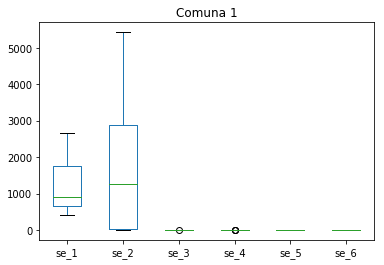

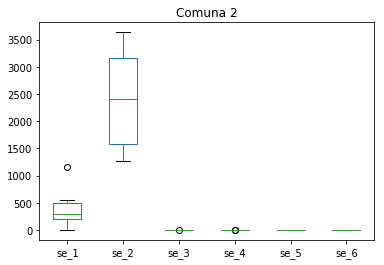

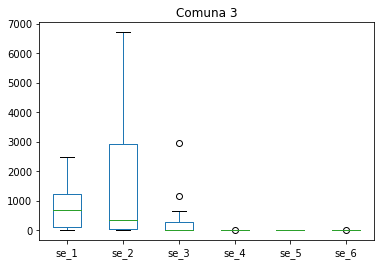

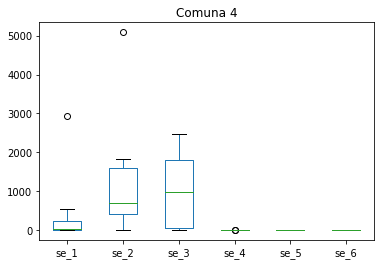

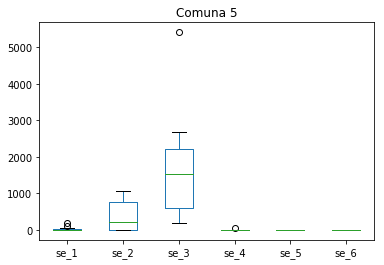

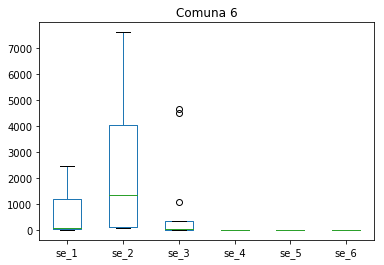

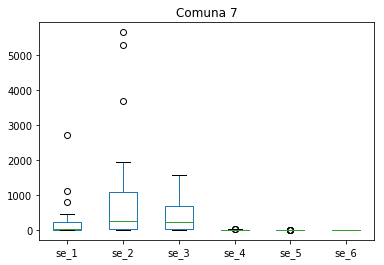

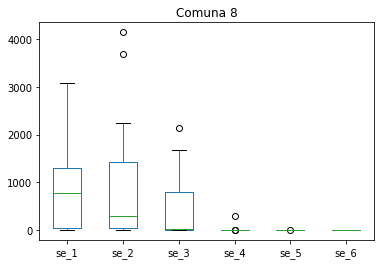

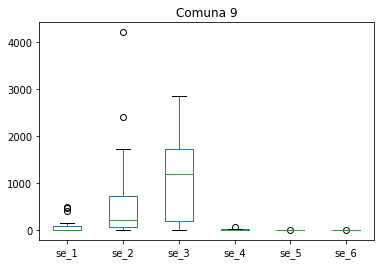

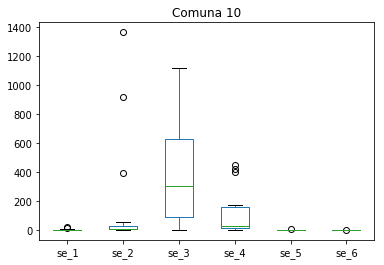

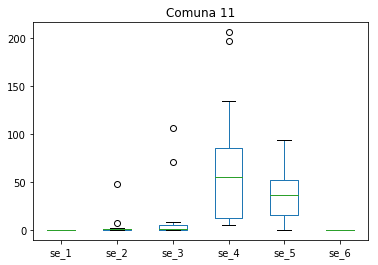

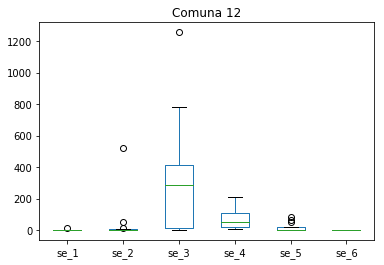

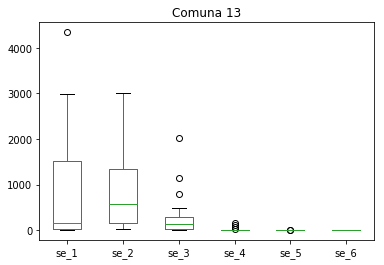

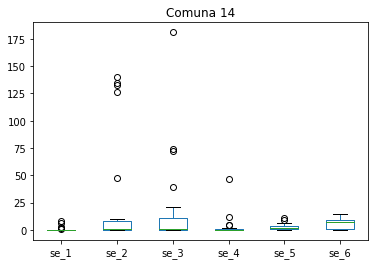

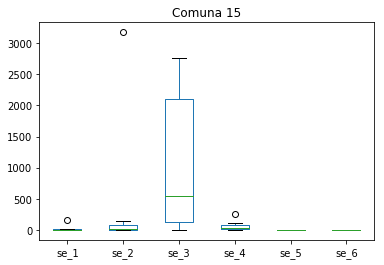

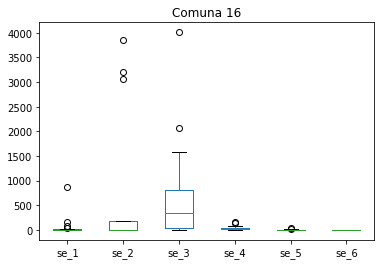

In [23]:
for i in range(1, 17):
    socioeconomic[socioeconomic['comuna_id'] == i][['se_1', 'se_2', 'se_3', 'se_4', 'se_5', 'se_6']].plot(kind='box')
    plt.title('Comuna ' + str(i))

We can see that in comuna 14 (the comuna where Medellin's wealthiest people live) it is nor normal for a neighborhood to have homes with a socioeconomic index of 1 and it is also not normal for a neighborhood for have more than about 20 homes with a soioeconomic of 20, so that data is ignored. This behavior is probably due to the fact that three or four neighborhoods belonging to this comuna are poor neighborhoods, that do not represent objectively the socioeconomic profile that predominates there.

In [24]:
print('The homes having a socioeconomic of 2 in comuna 14 account for ' + 
       str(int(round(temp.iloc[13]['se_2']/temp.iloc[13]['Total']*100,0)))  + '%' 
       + ' of the total.')

The homes having a socioeconomic of 2 in comuna 14 account for 46% of the total.


In [25]:
temp_se2 = []

for value in socioeconomic[socioeconomic['comuna_id'] == 14]['se_2']:
    if value > 20:
        temp_se2.append(0)
    else:
        temp_se2.append(value)

temp_se2
sumtemp=sum(temp_se2)

In [26]:
se_2 = temp.se_2
se_2[14] = sumtemp

temp_se1 = temp.se_1
temp_se1[14] = 0
temp.se_1 = temp_se1

temp['se_2'] = se_2
temp['Total'] = temp[['se_1', 'se_2', 'se_3', 'se_4', 'se_5', 'se_6']].sum(axis=1)
temp.head()

,se_1,se_2,se_3,se_4,se_5,se_6,Total,se
comuna_id,,,,,,,,
1,14248,21437,32,3,0,0,35720,2
2,4265,25761,18,5,0,0,30049,2
3,12609,25087,5328,10,0,1,43035,2
4,4197,14219,12907,24,0,0,31347,2
5,437,5419,23037,57,0,0,28950,3


In [27]:
temp_se = []

for index, row in temp.iterrows():
    s1 = row['se_1']*1
    s2 = row['se_2']*2
    s3 = row['se_3']*3
    s4 = row['se_4']*4
    s5 = row['se_5']*5
    s6 = row['se_6']*6
    s_mean = (s1 + s2 + s3 + s4 + s5 + s6)/row['Total']
    s_mean = round(s_mean, 0)
    temp_se.append(int(s_mean))
    
temp['se'] = temp_se    
comunas['se'] = temp['se']
temp

,se_1,se_2,se_3,se_4,se_5,se_6,Total,se
comuna_id,,,,,,,,
1,14248,21437,32,3,0,0,35720,2
2,4265,25761,18,5,0,0,30049,2
3,12609,25087,5328,10,0,1,43035,2
4,4197,14219,12907,24,0,0,31347,2
5,437,5419,23037,57,0,0,28950,3
6,7730,26855,10408,12,0,0,45005,2
7,6142,22503,9004,197,17,0,37863,2
8,16017,16983,7568,299,1,0,40868,2
9,1627,11571,18355,155,4,1,31713,3


In [28]:
print(comunas.head())
print(neighborhoods.head())

          name  latitude  longitude   ext  se
id                                           
1      Popular  6.291363 -75.543831  3.10   2
2   Santa Cruz  6.296625 -75.553276  2.20   2
3     Manrique  6.273411 -75.546230  5.10   2
4     Aranjuez  6.277750 -75.563424  4.88   2
5     Castilla  6.286568 -75.573337  6.06   3
     comuna                    name  latitude  longitude  se
id                                                          
101       1   Santo Domingo Savio 1  6.293187 -75.541724   2
102       1   Santo Domingo Savio 2  6.299993 -75.541499   1
103       1                 Popular  6.303366 -75.546594   2
104       1                Granizal  6.292365 -75.545866   2
105       1                 Moscu 2  6.288531 -75.547321   2


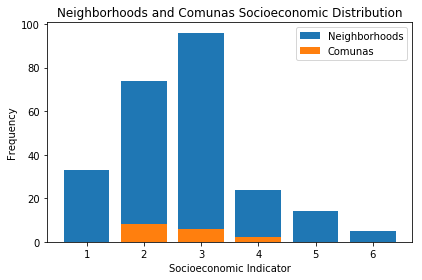

In [29]:
import matplotlib.pyplot as plt
plt.clf

freq_neigh = neighborhoods.se.value_counts(sort=False).tolist()
freq_com = [0, 8, 6, 2, 0, 0]

freq_neigh = pd.Series(freq_neigh)
freq_com = pd.Series(freq_com)

x_labels = [1,2,3,4,5,6]

plt
plt.bar(x_labels, freq_neigh)
plt.title('Neighborhoods and Comunas Socioeconomic Distribution')
plt.xlabel('Socioeconomic Indicator')
plt.ylabel('Frequency')
plt.bar(x_labels, freq_com)
plt.legend(['Neighborhoods', 'Comunas'])
plt.tight_layout()
plt.show()

We can see that in Medellin the most common socioeconomic is 3 (low-medium) and the majority of the people lives in neighborhoods where the socioeconomic index is between low-low to medium-low.

1 = low - low
2 = low
3 = low - medium
4 = medium
5 = high - medium
6 = high

For comunas the result is similar, with the low socioeconomic being the most common and medium the least common. In average there is not a single comuna that has a high socioeconomic, not even high - medium.

### Foursquare API

The foursqueare API will be used to retrieve the restaurants in each one of the comunas and see where are the majority of restaurants in Medellin

In [97]:
CLIENT_ID = 'ID' # your Foursquare ID
CLIENT_SECRET = 'SECRET' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ID
CLIENT_SECRET:SECRET


In order to have a value for the use of the foursquare API I used the extension of each comuna (km2) and assumed that the area was circular to obtain a value for the radius (m).

In [35]:
import math
import numpy as np
import json
from pandas.io.json import json_normalize
import requests

comunas['radius'] = round(np.sqrt(comunas['ext']/math.pi)*1000,0).astype(int)

In [36]:
comunas.head()

,name,latitude,longitude,ext,se,radius
id,,,,,,
1,Popular,6.291363,-75.543831,3.10,2,993
2,Santa Cruz,6.296625,-75.553276,2.20,2,837
3,Manrique,6.273411,-75.546230,5.10,2,1274
4,Aranjuez,6.277750,-75.563424,4.88,2,1246
5,Castilla,6.286568,-75.573337,6.06,3,1389


In [37]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [38]:
mde_venues = pd.DataFrame()

for index, comuna in comunas.iterrows():
    comuna_latitude = comuna['latitude']
    comuna_longitude = comuna['longitude']
    LIMIT = 200
    radius = comuna['radius']
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
        CLIENT_SECRET, VERSION, comuna_latitude, comuna_longitude, radius, LIMIT)
    
    results = requests.get(url).json()
    
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    nearby_venues['comuna'] = comuna['name']
    
    mde_venues = pd.concat([mde_venues, nearby_venues])
    
    
    print(comuna['name'] + ' done!')

Popular done!
Santa Cruz done!
Manrique done!
Aranjuez done!
Castilla done!
Doce de Octubre done!
Robledo done!
Villa Hermosa done!
Buenos Aires done!
La Candelaria done!
Laureles Estadio done!
La America done!
San Javier done!
El Poblado done!
Guayabal done!
Belen done!


Here we can see the amount of venues retrieved for each one of the comunas using the API in descending order

In [39]:
mde_venues.groupby('comuna').categories.count().sort_values(ascending=False)

comuna
Laureles Estadio    100
La Candelaria       100
El Poblado          100
Belen               100
Guayabal             78
La America           47
Robledo              33
Buenos Aires         24
Aranjuez             23
Villa Hermosa        21
San Javier           13
Manrique             12
Castilla             12
Santa Cruz            4
Popular               4
Doce de Octubre       4
Name: categories, dtype: int64

Now I am going to filter the results in order to keep only those venues containing the word Restaurant in the category field

In [40]:
restaurants = pd.DataFrame(mde_venues[mde_venues['categories'].str.lower().str.contains('restaurant')].groupby(
    'comuna').categories.count().sort_values(ascending=False))
restaurants.columns = ['count']
restaurants

,count
comuna,
El Poblado,37
Laureles Estadio,30
La Candelaria,21
Guayabal,21
Belen,18
La America,7
Robledo,5
Buenos Aires,4
Aranjuez,2


In [41]:
restaurants = restaurants.merge(comunas[['name', 'ext']], left_index=True, right_on='name')
restaurants

,count,name,ext
id,,,
14,37,El Poblado,14.42
11,30,Laureles Estadio,7.40
10,21,La Candelaria,7.36
15,21,Guayabal,7.29
16,18,Belen,8.86
12,7,La America,3.97
7,5,Robledo,9.46
9,4,Buenos Aires,6.05
4,2,Aranjuez,4.88


Exploring the results from the API we can see that there are some venues that are food places but not necessarily contain the word restaurant, so I created a list of terms that the category field should not contain in order to get the rest of the results.

In [42]:
categories = pd.DataFrame(mde_venues.categories.unique())
categories.columns = ['categories']
categories = pd.DataFrame(categories[~categories['categories'].str.lower().str.contains('restaurant')])

words_list = ['park', 'plaza', 'museum', 'gym', 'department', 'hostel', 'hotel', 'bowling', 
              'rock', 'rental', 'shop', 'entertainment', 'service', 'school', 'store', 
              'car', 'metro', 'soccer', 'bus', 'house', 'airport', 'zoo', 'other', 'garden', 'aquarium',
             'market', 'cine', 'construction', 'event', 'planetarium', 'center', 'multiplex', 'court',
             'hall', 'playground', 'auto', 'scen', 'theat', 'bar', 'club', 'studio', 'pool', 'stadium',
             'sport', 'station', 'laundro', 'nature', 'provider', 'art', 'hous', 'road', 'histor']

for word in words_list:
    word.lower()
    categories = pd.DataFrame(categories[~categories['categories'].str.lower().str.contains(word)])

category_filter = categories.categories.tolist()

In [43]:
others = pd.DataFrame(mde_venues[mde_venues['categories'].isin(category_filter)].groupby('comuna').count()['categories'])

In [44]:
others = others.merge(comunas[['name', 'ext']], left_index=True, right_on='name')

In [45]:
others.sort_values('categories', ascending=False)

,categories,name,ext
id,,,
16,34,Belen,8.86
11,32,Laureles Estadio,7.40
14,31,El Poblado,14.42
15,24,Guayabal,7.29
10,23,La Candelaria,7.36
12,16,La America,3.97
7,7,Robledo,9.46
4,4,Aranjuez,4.88
9,4,Buenos Aires,6.05


In [46]:
restaurants = restaurants.merge(others, left_index=True, right_index=True)
restaurants['count'] = restaurants['count'] + restaurants['categories']

In [47]:
restaurants.drop('categories', inplace=True, axis=1)

We create a DataFrame named restaurants with the count of restaurants and food places found in each comuna, the name of the comuna and its extension

In [48]:
restaurants

,count,name_x,ext_x,name_y,ext_y
id,,,,,
14,68,El Poblado,14.42,El Poblado,14.42
11,62,Laureles Estadio,7.40,Laureles Estadio,7.40
10,44,La Candelaria,7.36,La Candelaria,7.36
15,45,Guayabal,7.29,Guayabal,7.29
16,52,Belen,8.86,Belen,8.86
12,23,La America,3.97,La America,3.97
7,12,Robledo,9.46,Robledo,9.46
9,8,Buenos Aires,6.05,Buenos Aires,6.05
4,6,Aranjuez,4.88,Aranjuez,4.88


In [49]:
restaurants.drop(['name_x', 'ext_x'], inplace=True, axis=1)
restaurants.columns = ['count', 'comuna', 'ext']

In [50]:
restaurants = pd.DataFrame(restaurants[['comuna', 'count', 'ext']])
restaurants['restaurant_density'] = restaurants['count']/restaurants['ext']

In [51]:
restaurants.sort_values('restaurant_density', ascending=False, inplace=True)

In [52]:
restaurants = pd.merge(restaurants, comunas[['name', 'se']], left_index=True, right_index=True).sort_values('count', ascending=False)

In [53]:
restaurants_comunas = pd.DataFrame(restaurants)
restaurants_comunas

,comuna,count,ext,restaurant_density,name,se
id,,,,,,
14,El Poblado,68,14.42,4.715673,El Poblado,4
11,Laureles Estadio,62,7.40,8.378378,Laureles Estadio,4
16,Belen,52,8.86,5.869074,Belen,3
15,Guayabal,45,7.29,6.172840,Guayabal,3
10,La Candelaria,44,7.36,5.978261,La Candelaria,3
12,La America,23,3.97,5.793451,La America,3
7,Robledo,12,9.46,1.268499,Robledo,2
9,Buenos Aires,8,6.05,1.322314,Buenos Aires,3
4,Aranjuez,6,4.88,1.229508,Aranjuez,2


In [54]:
restaurants_comunas.sort_index(inplace=True)
restaurants_comunas

,comuna,count,ext,restaurant_density,name,se
id,,,,,,
4,Aranjuez,6,4.88,1.229508,Aranjuez,2
7,Robledo,12,9.46,1.268499,Robledo,2
8,Villa Hermosa,4,5.72,0.699301,Villa Hermosa,2
9,Buenos Aires,8,6.05,1.322314,Buenos Aires,3
10,La Candelaria,44,7.36,5.978261,La Candelaria,3
11,Laureles Estadio,62,7.40,8.378378,Laureles Estadio,4
12,La America,23,3.97,5.793451,La America,3
14,El Poblado,68,14.42,4.715673,El Poblado,4
15,Guayabal,45,7.29,6.172840,Guayabal,3


Now we have a new DataFrame that also contains the socioeconomic of the comuna and a calculated field named restaurant density which represents the amount of restaurants in the comuna per square km.

Now using the document available in:
https://www.medellin.gov.co/irj/go/km/docs/pccdesign/SubportaldelCiudadano_2/PlandeDesarrollo/ObservatoriodePolticasPblicas/Shared%20Content/Boletin%20Mercado%20Inmobiliario%20Trimestre%202%20de%202014.pdf

we add the data of the average rent price in each comuna. There are 2 comunas for which there is not info available so we use the mean of the rent for the corresponding socioeconomic index of the comuna.

Note: We can see that at first there were 16 comunas, now we have just 10, that is because there were some comunas for which there were not venues found.

In [55]:
avg_rent = [np.NaN, 0.6, 0.4, 0.4, 0.6, 1, 0.7, 1.3, np.NaN, 0.8]
restaurants_comunas['avg_rent'] = avg_rent
restaurants_comunas

,comuna,count,ext,restaurant_density,name,se,avg_rent
id,,,,,,,
4,Aranjuez,6,4.88,1.229508,Aranjuez,2,NaN
7,Robledo,12,9.46,1.268499,Robledo,2,0.6
8,Villa Hermosa,4,5.72,0.699301,Villa Hermosa,2,0.4
9,Buenos Aires,8,6.05,1.322314,Buenos Aires,3,0.4
10,La Candelaria,44,7.36,5.978261,La Candelaria,3,0.6
11,Laureles Estadio,62,7.40,8.378378,Laureles Estadio,4,1.0
12,La America,23,3.97,5.793451,La America,3,0.7
14,El Poblado,68,14.42,4.715673,El Poblado,4,1.3
15,Guayabal,45,7.29,6.172840,Guayabal,3,NaN


In [56]:
avg_rent_se = restaurants_comunas[['se', 'avg_rent']].groupby('se').mean().round(1)
avg_rent_se

,avg_rent
se,
2,0.5
3,0.6
4,1.2


In [57]:
restaurants_comunas.loc[4, 'avg_rent'] = 0.5
restaurants_comunas.loc[15, 'avg_rent'] = 0.6
restaurants_comunas.drop(['name', 'ext'], inplace=True, axis=1)
restaurants_comunas

,comuna,count,restaurant_density,se,avg_rent
id,,,,,
4,Aranjuez,6,1.229508,2,0.5
7,Robledo,12,1.268499,2,0.6
8,Villa Hermosa,4,0.699301,2,0.4
9,Buenos Aires,8,1.322314,3,0.4
10,La Candelaria,44,5.978261,3,0.6
11,Laureles Estadio,62,8.378378,4,1.0
12,La America,23,5.793451,3,0.7
14,El Poblado,68,4.715673,4,1.3
15,Guayabal,45,6.172840,3,0.6


In [58]:
neighborhoods.head()

,comuna,name,latitude,longitude,se
id,,,,,
101,1,Santo Domingo Savio 1,6.293187,-75.541724,2
102,1,Santo Domingo Savio 2,6.299993,-75.541499,1
103,1,Popular,6.303366,-75.546594,2
104,1,Granizal,6.292365,-75.545866,2
105,1,Moscu 2,6.288531,-75.547321,2


Below I am going to calculate some new fields to normalize each of the columns we have in the DataFrame, and then calculate a score for each comuna.

For the score computing I am going to use some weights for each factor, taking into account that restaurant density and socioeconomic index is not as important as restaurant count and avg rent.

In [59]:
rest_com_norm = pd.DataFrame(restaurants_comunas)

cols = [['count_norm', 'count'],
       ['rest_density_norm', 'restaurant_density'],
       ['se_norm', 'se'],
       ['avg_rent_norm', 'avg_rent']]

for col in cols:
    rest_com_norm[col[0]] = (rest_com_norm[col[1]]-min(rest_com_norm[col[1]]))/(max(rest_com_norm[col[1]])
                                                                                    -min(rest_com_norm[col[1]]))

score=[]
    
for index, row in rest_com_norm.iterrows():
    x1 = row['count_norm']*0.4
    x2 = row['rest_density_norm']*0.2
    x3 = row['se_norm']*0.2
    x4 = row['avg_rent_norm']*0.4
    score.append(x1+x2+x3+x4)
    
rest_com_norm['score'] = score 
    
rest_com_norm

,comuna,count,restaurant_density,se,avg_rent,count_norm,rest_density_norm,se_norm,avg_rent_norm,score
id,,,,,,,,,,
4,Aranjuez,6,1.229508,2,0.5,0.031250,0.069046,0.0,0.111111,0.070754
7,Robledo,12,1.268499,2,0.6,0.125000,0.074123,0.0,0.222222,0.153714
8,Villa Hermosa,4,0.699301,2,0.4,0.000000,0.000000,0.0,0.000000,0.000000
9,Buenos Aires,8,1.322314,3,0.4,0.062500,0.081131,0.5,0.000000,0.141226
10,La Candelaria,44,5.978261,3,0.6,0.625000,0.687447,0.5,0.222222,0.576378
11,Laureles Estadio,62,8.378378,4,1.0,0.906250,1.000000,1.0,0.666667,1.029167
12,La America,23,5.793451,3,0.7,0.296875,0.663380,0.5,0.333333,0.484759
14,El Poblado,68,4.715673,4,1.3,1.000000,0.523028,1.0,1.000000,1.104606
15,Guayabal,45,6.172840,3,0.6,0.640625,0.712786,0.5,0.222222,0.587696


In [60]:
rest_com_norm.sort_values('score', inplace=True, ascending=False)
rest_com_norm

,comuna,count,restaurant_density,se,avg_rent,count_norm,rest_density_norm,se_norm,avg_rent_norm,score
id,,,,,,,,,,
14,El Poblado,68,4.715673,4,1.3,1.000000,0.523028,1.0,1.000000,1.104606
11,Laureles Estadio,62,8.378378,4,1.0,0.906250,1.000000,1.0,0.666667,1.029167
16,Belen,52,5.869074,3,0.8,0.750000,0.673228,0.5,0.444444,0.712423
15,Guayabal,45,6.172840,3,0.6,0.640625,0.712786,0.5,0.222222,0.587696
10,La Candelaria,44,5.978261,3,0.6,0.625000,0.687447,0.5,0.222222,0.576378
12,La America,23,5.793451,3,0.7,0.296875,0.663380,0.5,0.333333,0.484759
7,Robledo,12,1.268499,2,0.6,0.125000,0.074123,0.0,0.222222,0.153714
9,Buenos Aires,8,1.322314,3,0.4,0.062500,0.081131,0.5,0.000000,0.141226
4,Aranjuez,6,1.229508,2,0.5,0.031250,0.069046,0.0,0.111111,0.070754


# Clustering of Comunas

In [61]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [76]:
com_cluster = pd.DataFrame(rest_com_norm)
com_cluster.drop(['comuna', 'count_norm', 'rest_density_norm', 'se_norm', 'se_norm', 'score', 'avg_rent_norm', 'kmeans_labels'], inplace=True, axis=1)
com_cluster

,count,restaurant_density,se,avg_rent
id,,,,
14,68,4.715673,4,1.3
11,62,8.378378,4,1.0
16,52,5.869074,3,0.8
15,45,6.172840,3,0.6
10,44,5.978261,3,0.6
12,23,5.793451,3,0.7
7,12,1.268499,2,0.6
9,8,1.322314,3,0.4
4,6,1.229508,2,0.5


Given that we have 3 features, I am going to use PCA for dimensionality reduction, in order to be able to plot the results of the clustering.

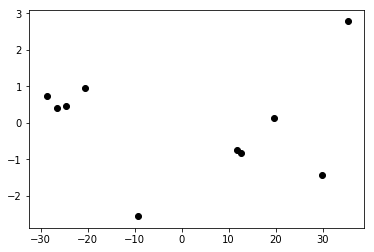

In [77]:
pca = PCA(n_components=2)
pca.fit(com_cluster)
pca_2d = pca.transform(com_cluster)
pca_2d

for i in range(10):
    plt.scatter(pca_2d[i][0], pca_2d[i][1], color='k')

plt.show()

In [78]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(pca_2d)

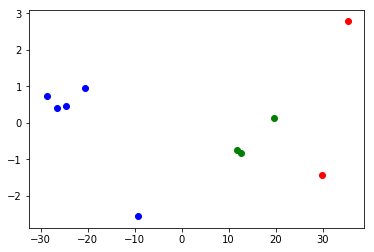

In [79]:
colors=['r', 'b', 'g', 'k', 'c', 'm', 'y']

i=0
for point in pca_2d:
    x = y_km[i]
    plt.scatter(point[0], point[1], color=colors[x])
    i+=1
    
plt.show()

In order to find the right amount of clusters for this case I am going to use the elbow method

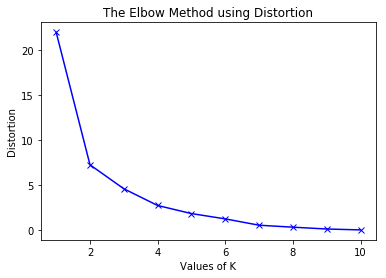

In [80]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,11) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(pca_2d) 
    kmeanModel.fit(pca_2d)     
      
    distortions.append(sum(np.min(cdist(pca_2d, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / pca_2d.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(pca_2d, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / pca_2d.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

According to the graph the best number of Ks is 4

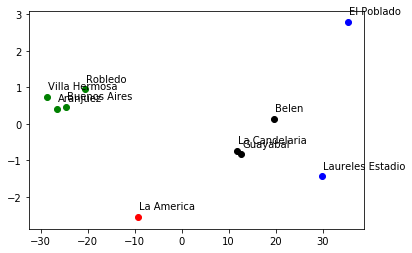

In [93]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(pca_2d)

colors=['r', 'b', 'g', 'k', 'c', 'm', 'y']

i=0
for point in pca_2d:
    x = y_km[i]
    plt.scatter(point[0], point[1], color=colors[x])
    i+=1

n = rest_com_norm['comuna'].tolist()

    
for j, txt in enumerate(n):
    plt.annotate(txt, (pca_2d[j][0]+0.2, pca_2d[j][1]+0.2))
    
plt.show()

In [82]:
labels = km.labels_.tolist()
rest_com_norm['kmeans_labels'] = labels
pd.concat([rest_com_norm.loc[:,'count':'avg_rent'],
          rest_com_norm.loc[:,'count_norm':'avg_rent_norm'], 
           rest_com_norm['kmeans_labels'],
          rest_com_norm['score'],
          rest_com_norm['comuna']], axis=1).sort_values('kmeans_labels')

,count,restaurant_density,se,avg_rent,count_norm,rest_density_norm,se_norm,avg_rent_norm,kmeans_labels,score,comuna
id,,,,,,,,,,,
12,23,5.793451,3,0.7,0.296875,0.663380,0.5,0.333333,0,0.484759,La America
14,68,4.715673,4,1.3,1.000000,0.523028,1.0,1.000000,1,1.104606,El Poblado
11,62,8.378378,4,1.0,0.906250,1.000000,1.0,0.666667,1,1.029167,Laureles Estadio
7,12,1.268499,2,0.6,0.125000,0.074123,0.0,0.222222,2,0.153714,Robledo
9,8,1.322314,3,0.4,0.062500,0.081131,0.5,0.000000,2,0.141226,Buenos Aires
4,6,1.229508,2,0.5,0.031250,0.069046,0.0,0.111111,2,0.070754,Aranjuez
8,4,0.699301,2,0.4,0.000000,0.000000,0.0,0.000000,2,0.000000,Villa Hermosa
16,52,5.869074,3,0.8,0.750000,0.673228,0.5,0.444444,3,0.712423,Belen
15,45,6.172840,3,0.6,0.640625,0.712786,0.5,0.222222,3,0.587696,Guayabal


In [96]:
pd.concat([rest_com_norm.loc[:,'count':'avg_rent'],
          rest_com_norm.loc[:,'count_norm':'avg_rent_norm'], 
           rest_com_norm['kmeans_labels'],
          rest_com_norm['score'],
          rest_com_norm['comuna']], axis=1).sort_values('score', ascending=False)

,count,restaurant_density,se,avg_rent,count_norm,rest_density_norm,se_norm,avg_rent_norm,kmeans_labels,score,comuna
id,,,,,,,,,,,
14,68,4.715673,4,1.3,1.000000,0.523028,1.0,1.000000,1,1.104606,El Poblado
11,62,8.378378,4,1.0,0.906250,1.000000,1.0,0.666667,1,1.029167,Laureles Estadio
16,52,5.869074,3,0.8,0.750000,0.673228,0.5,0.444444,3,0.712423,Belen
15,45,6.172840,3,0.6,0.640625,0.712786,0.5,0.222222,3,0.587696,Guayabal
10,44,5.978261,3,0.6,0.625000,0.687447,0.5,0.222222,3,0.576378,La Candelaria
12,23,5.793451,3,0.7,0.296875,0.663380,0.5,0.333333,0,0.484759,La America
7,12,1.268499,2,0.6,0.125000,0.074123,0.0,0.222222,2,0.153714,Robledo
9,8,1.322314,3,0.4,0.062500,0.081131,0.5,0.000000,2,0.141226,Buenos Aires
4,6,1.229508,2,0.5,0.031250,0.069046,0.0,0.111111,2,0.070754,Aranjuez


In [84]:
com_top = pd.DataFrame(rest_com_norm.head(2))
com_top = com_top.loc[:, ['comuna', 'score']]

In [85]:
ids = com_top.index.values.tolist()
ids

[14, 11]

In [94]:
neigh_top = pd.DataFrame(neighborhoods[neighborhoods['comuna'].isin(ids)])
print('There are ' + str(neigh_top.shape[0]) + ' neighborhoods in the top 2 comunas')
neigh_top.head()

There are 37 neighborhoods in the top 2 comunas


,comuna,name,latitude,longitude,se
id,,,,,
1101,11,Carlos E. Restrepo,6.258472,-75.580795,4
1102,11,Suramericana,6.255346,-75.584433,5
1103,11,Naranjal,6.250181,-75.584433,3
1104,11,San Joaquin,6.246974,-75.585161,4
1105,11,Los Conquistadores,6.242355,-75.581523,5


In [87]:
neigh_top[neigh_top['se'] >= 5].sort_values('se', ascending=False)

,comuna,name,latitude,longitude,se
id,,,,,
1406,14,Las Lomas No.1,6.210818,-75.561149,6
1413,14,El Diamante No.2,6.285250,-75.585219,6
1420,14,Astorga,6.210516,-75.573519,6
1422,14,La Aguacatala,6.199026,-75.577885,6
1423,14,Santa Maria de los Angeles,6.190038,-75.579340,6
1102,11,Suramericana,6.255346,-75.584433,5
1105,11,Los Conquistadores,6.242355,-75.581523,5
1108,11,Laureles,6.251594,-75.588799,5
1109,11,Las Acacias,6.240964,-75.601167,5
